<img src='logo.png' alt='logo' width=200 align='center' />

<h1 align='center'> The Sparks Foundation </h1>

<h2 align='center'> Data Science and Business Analytics. </h2>

<h2 align='center'> Task: 01 </h2>

<h3 align='center'> Prediction using Decision Tree Algorithm  </h3>

<h4 align='center'> The purpose is it we feed any new data to this classifier, it would be able to predict the right class accordingly using the given <b> IRIS </b> dataset. </h4>

<h2 align='center'> By: Srinivasan Nandhakumar </h2>

# Step 1: Import Libraries
In this step, we import the necessary libraries that provide functionality for data handling, machine learning algorithms, and visualization.

In [1]:
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # For creating and visualizing Decision Tree
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import seaborn as sns # For plotting graphs and visualizations

## Step 2: Load and Explore the Dataset
Here, we load the dataset into a DataFrame and examine its structure to understand what kind of data we're dealing with.

In [2]:
# Load the dataset from a URL
df = pd.read_csv("Iris.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#Checking for the null values.
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Descriptive analysis of the Dataset.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Droping Unnecessary Column
df.drop(labels = 'Id', axis = 1 , inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


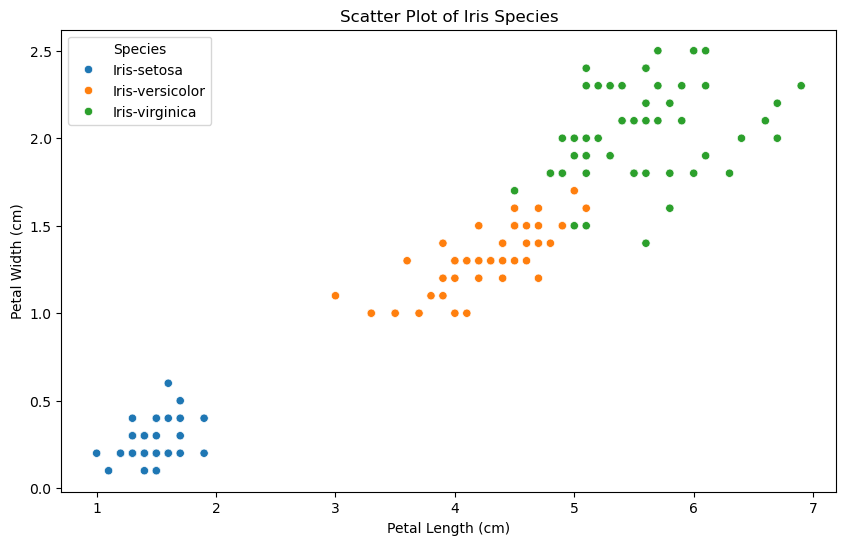

In [7]:
# Plotting Scatter plot of Species
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")
plt.title("Scatter Plot of Iris Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

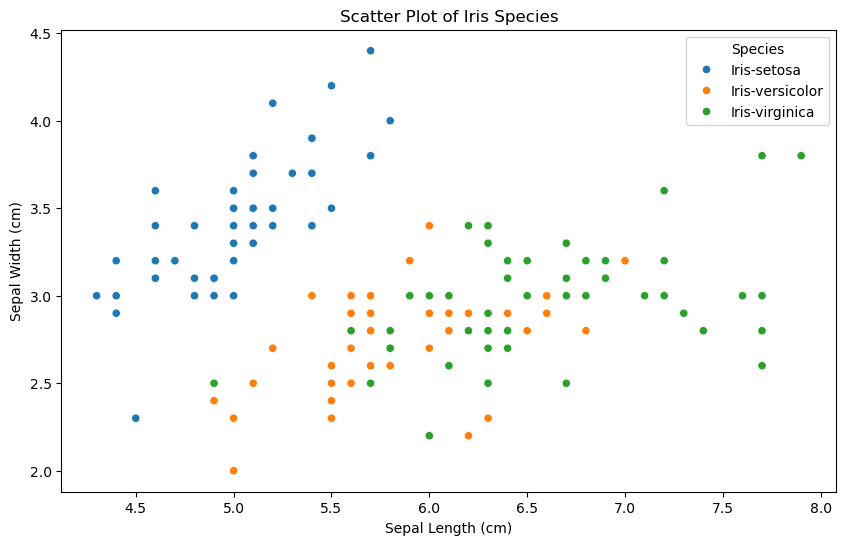

In [8]:
# Plotting Scatter plot of Species
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
plt.title("Scatter Plot of Iris Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

## Step 3: Prepare the Data
Data preparation involves organizing the dataset into features (input variables) and target (output variable), and then splitting it into training and testing sets.

In [9]:
# Separate the features (X) and target variable (y)
X = df.drop("Species", axis=1)  # Features are all columns except 'species'
y = df['Species']  # Target variable is 'species'

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 4: Train the Decision Tree Classifier
Now we'll create and train a Decision Tree classifier using the training data (X_train, y_train)

In [10]:
# Create a Decision Tree classifier object
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Step 5: Evaluate the Model
After training the model, we evaluate its performance using metrics like accuracy and a classification report.

In [11]:
# Use the trained model to make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report to evaluate precision, recall, F1-score, etc.
print(classification_report(y_test, y_pred))


Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Step 6: Visualize the Decision Tree
Finally, we visualize the decision-making process of the Decision Tree classifier using a graphical representation.

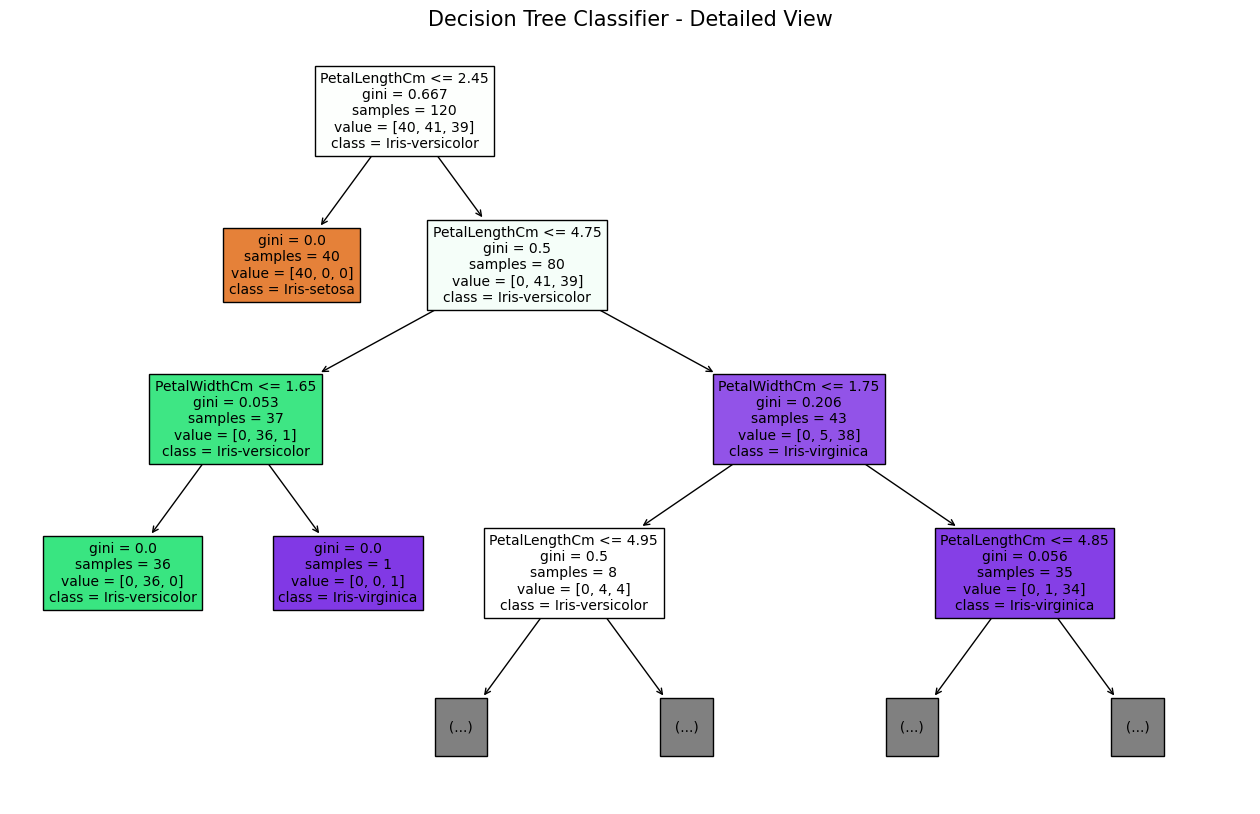

In [12]:
# Plot the Decision Tree with more levels
plt.figure(figsize=(16, 10))
plot_tree(dt_classifier, 
          feature_names=X.columns, 
          class_names=df['Species'].unique(), 
          filled=True,
          max_depth=3,  # Specify the maximum depth of the tree to visualize
          fontsize=10)  # Adjust font size for better readability
plt.title("Decision Tree Classifier - Detailed View", fontsize=15)
plt.show()

## Conclusion
Following these steps will help you build and evaluate a Decision Tree classifier for your dataset. Visualizing the decision tree can provide insights into how the classifier makes predictions based on the input features. 

In [13]:
# To predict a new instance
new_data = [[5.1, 3.5, 1.4, 0.2]]
prediction = dt_classifier.predict(new_data)
print(f'Predicted class: {prediction[0]}')

Predicted class: Iris-setosa


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
